In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

c:\Users\timvd\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### init data

In [3]:
PATH = os.getcwd()
DATAPATH = os.path.join(PATH,'data')
filenames = {
    "X_train":"train_in - Copy.csv", "y_train":"train_out - Copy.csv","X_test":"test_in - Copy.csv","y_test":"test_out - Copy.csv"
    }
X_train, y_train = pd.read_csv(os.path.join(DATAPATH,filenames["X_train"]),header=None),pd.read_csv(os.path.join(DATAPATH,filenames["y_train"]),header=None,names=['digit'])
X_test,y_test = pd.read_csv(os.path.join(DATAPATH,filenames["X_test"]),header=None),pd.read_csv(os.path.join(DATAPATH,filenames["y_test"]),header=None,names=['digit'])
X_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.401,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,-0.983,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,-0.822,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.491,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


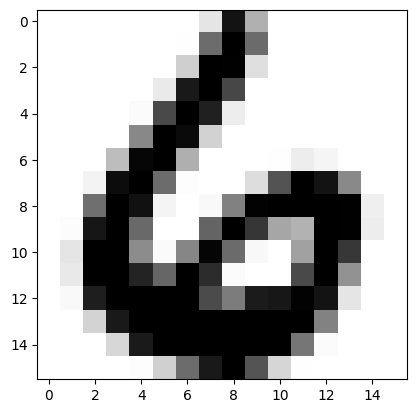

In [4]:
for i in range(1):
    plt.imshow(X_train.iloc[i].to_numpy().reshape(16,16),cmap="Greys")
    plt.show()

In [5]:
def center_img(X, y, digit: int):
    """Calculate the center of the cloud in 256 dim space for `digit`"""
    return X[y.digit == digit].mean()

def dist(src, dst):
    """Calculate the distance between `src` and `dst` using norm 2 distance"""
    return ((src - dst)**2).sum()

## PCA
reduce 256 dimensions to 2D 

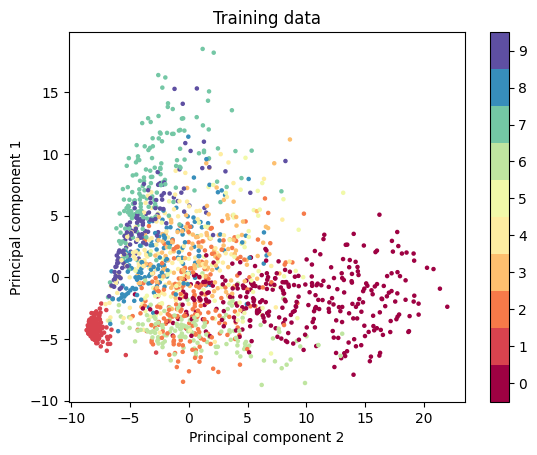

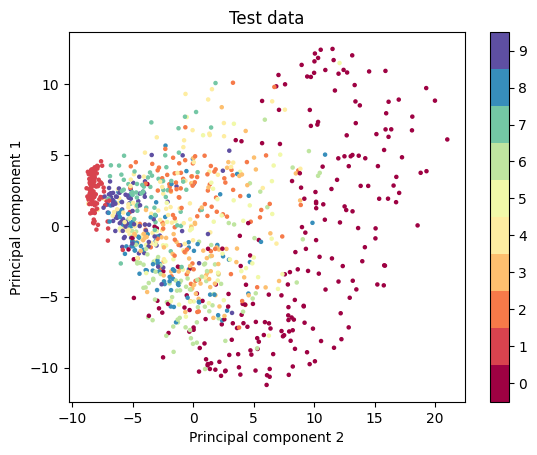

In [63]:
from sklearn.metrics import accuracy_score

def center_img(X,y,digit: int):
    return np.array(X[y.digit==digit].mean()) 

# centers = [center_img(X_train.values,y_train.values,i) for i in range(10)]

def PCA_vis(Xdata,ydata,test_or_train,ncomp=2,rand=42):
    pca = PCA(n_components=ncomp,random_state=rand)
    scaler = StandardScaler()
    Xdata_norm = scaler.fit_transform(Xdata)
    pca_data = pca.fit_transform(Xdata_norm)

    plt.figure()
    plt.scatter(pca_data[:,0],pca_data[:,1],c=ydata.digit,cmap='Spectral',s=5)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.xlabel("Principal component 2")
    plt.ylabel("Principal component 1")
    plt.title("{}".format(test_or_train))
    plt.show()

PCA_vis(X_train,y_train,"Training data")
PCA_vis(X_test,y_test,"Test data")

(10, 256)


## UMAP

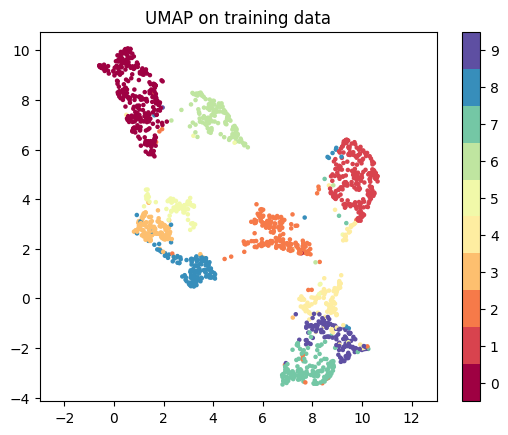

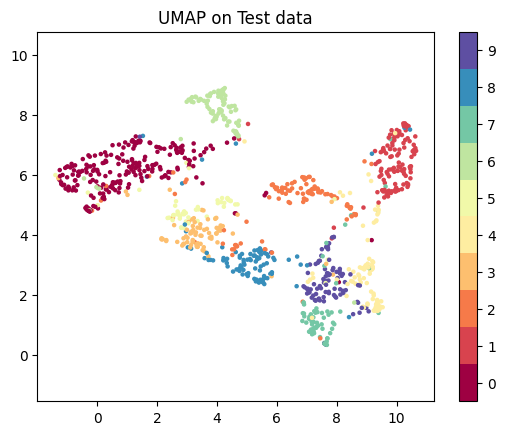

In [20]:
def UMAP_vis(Xdata,ydata,test_or_train,rand=42):
    reducer = umap.UMAP(random_state=rand)
    reducer.fit(Xdata)
    embedding = reducer.transform(Xdata)

    plt.figure()
    plt.scatter(embedding[:, 0], embedding[:, 1], c=ydata.digit, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('UMAP on {}'.format(test_or_train))
    plt.show()

UMAP_vis(X_train,y_train,"training data")
UMAP_vis(X_test,y_test,"test data")


## T-SNE

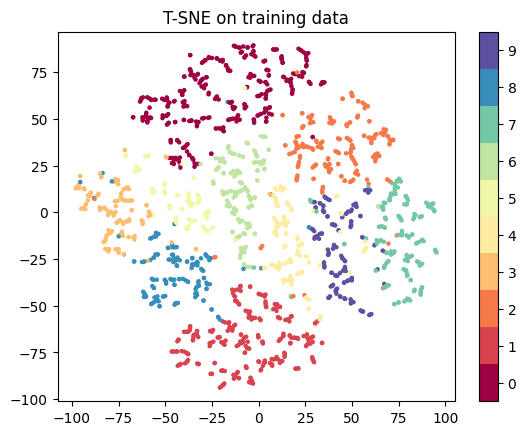

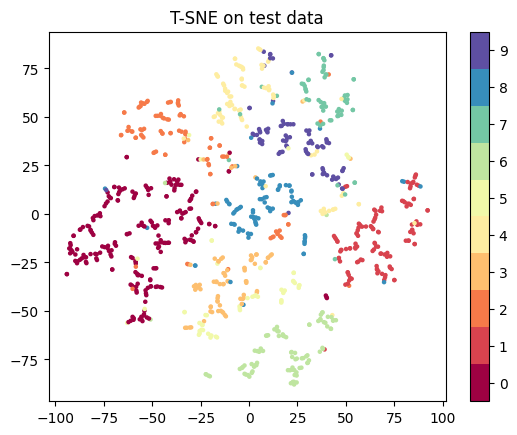

In [27]:
def TSNE_vis(Xdata,ydata,test_or_train):
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(Xdata)

    plt.figure()
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=ydata.digit,cmap='Spectral',s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title("T-SNE on {}".format(test_or_train))
    plt.show()

TSNE_vis(X_train,y_train,"training data")
TSNE_vis(X_test,y_test,"test data")